In [ ]:
import pandas as pd
train_dir='/content/test'
test_dir='/content/train'

In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`  #TO REMOVE.IPYNB CHECKPOINTS


In [ ]:
import os
classes_train=os.listdir(train_dir)
classes_test=os.listdir(test_dir)

In [ ]:
print(classes_train)

['PNEUMONIA', 'NORMAL']


In [ ]:
print(classes_test)

['PNEUMONIA', 'NORMAL']


7. Data Augmentation

We need to know what is the data augmentation Datat augmentation means generate new data from exisiting data. We do this because the performance of deep learning neural networks often improves with the amount of data available. In this example the data was small so we use this

In [ ]:
# First for Training data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1.0/255.0, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1 #Shear angle in counter-clockwise direction in degrees
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 40 images belonging to 2 classes.


In [ ]:
# Second for Testing data
test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 147 images belonging to 2 classes.


Callbacks

Callbacks is a method we use it to reduce over fiting and to save time. We will use EarlyStopping to stop the training process if the accuracy dose not improved for 5 times. ReduceLROnPlateau to minimize learning rate if the accuracy dose not improved for 2 times

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.001
)

Model

In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Build new sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(299, 299, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up data generators for train and test sets
train_dir = '/content/train'
test_dir = '/content/test'
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary')

# Fit the model to the data
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)



Found 147 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
4/4 [==============================] - 21s 2s/step - loss: 0.7610 - accuracy: 0.7043 - val_loss: 0.3002 - val_accuracy: 0.8750
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 0.4185 - accuracy: 0.8783 - val_loss: 0.5239 - val_accuracy: 0.7812
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.2305 - accuracy: 0.9043 - val_loss: 2.3177 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.2399 - accuracy: 0.9304 - val_loss: 2.1974 - val_accuracy: 0.5625
Epoch 5/10
4/4 [==============================] - 9s 2s/step - loss: 0.2646 - accuracy: 0.8828 - val_loss: 1.9879 - val_accuracy: 0.5938
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 0.3030 - accuracy: 0.8783 - val_loss: 0.8977 - val_accuracy: 0.7188
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.1820 - accuracy: 0.9062 -

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 148, 148, 32)     0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 148, 148, 32)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 73, 73, 64)       

dont...................

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

................................

Fit

In [ ]:
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10
5/5 [==============================] - 240s 46s/step - loss: 3.8998 - accuracy: 0.5342 - binary_accuracy: 0.4726 - val_loss: 1.0984 - val_accuracy: 0.5000 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 234s 45s/step - loss: 4.8687 - accuracy: 0.5068 - binary_accuracy: 0.5000 - val_loss: 1.0549 - val_accuracy: 0.5000 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 240s 47s/step - loss: 4.3579 - accuracy: 0.5137 - binary_accuracy: 0.5068 - val_loss: 0.7676 - val_accuracy: 0.5000 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 234s 45s/step - loss: 4.7771 - accuracy: 0.5137 - binary_accuracy: 0.4932 - val_loss: 0.9298 - val_accuracy: 0.5000 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 235s 46s/step - loss: 4.8735 - accuracy: 0.5000 - binary_accuracy: 0.5000 - val_loss: 0.7627 - val_accuracy: 0.500

In [ ]:

model.save('model.h5')

Accuracy

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.761025,0.704348,0.300188,0.87500
1,0.418492,0.878261,0.523913,0.78125
2,0.230536,0.904348,2.317688,0.50000
3,0.239912,0.930435,2.197436,0.56250
4,0.264561,0.882812,1.987900,0.59375


<Axes: >

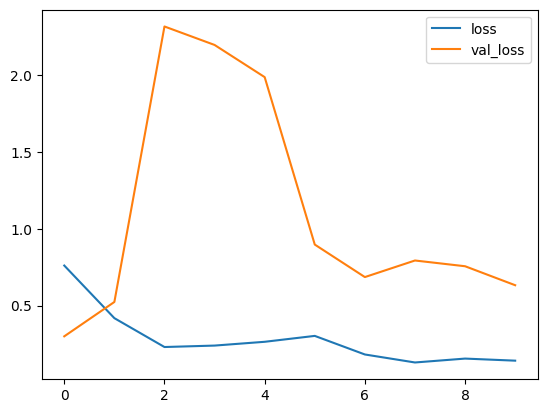

In [ ]:
losses[['loss','val_loss']].plot()

<Axes: >

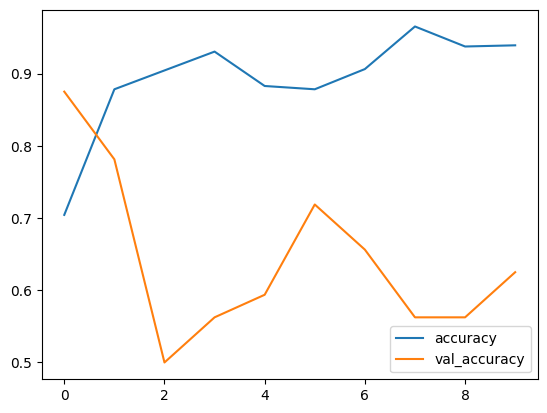

In [ ]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

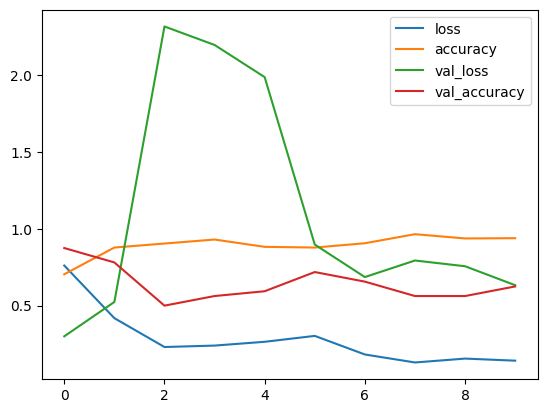

In [ ]:
losses.plot()

In [ ]:
model.evaluate(test_generator)

2/2 [==============================] - 2s 585ms/step - loss: 0.6329 - accuracy: 0.6250


[0.6328693628311157, 0.625]

predictions

In [ ]:
model_pred=model.predict(test_generator)

2/2 [==============================] - 1s 155ms/step


In [ ]:
print(model_pred)

[[0.6421786 ]
 [0.0379274 ]
 [0.9986457 ]
 [0.99493563]
 [0.52730507]
 [0.9513671 ]
 [0.3036861 ]
 [0.0137891 ]
 [0.16564715]
 [0.96973383]
 [0.36242375]
 [0.6133229 ]
 [0.4219042 ]
 [0.6417403 ]
 [0.91232324]
 [0.9937816 ]
 [0.27397898]
 [0.861764  ]
 [0.99073774]
 [0.09373944]
 [0.9985202 ]
 [0.86121255]
 [0.15094249]
 [0.89585406]
 [0.96238756]
 [0.6331361 ]
 [0.43347916]
 [0.5118872 ]
 [0.9606057 ]
 [0.78749967]
 [0.05154546]
 [0.8922219 ]
 [0.40916985]
 [0.11337229]
 [0.3894435 ]
 [0.72303855]
 [0.14575435]
 [0.5877694 ]
 [0.8829427 ]
 [0.9052856 ]]


In [ ]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
class_names=['NORMAL','PNEUMONIA']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_prediction(test_generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    images, labels = test_generator.next()
    predictions = np.argmax(model.predict(images), axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g')
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r')
            plt.axis('off')
        i += 1
        if i == n_images:
            break

    plt.show()

1/1 [==============================] - 0s 144ms/step


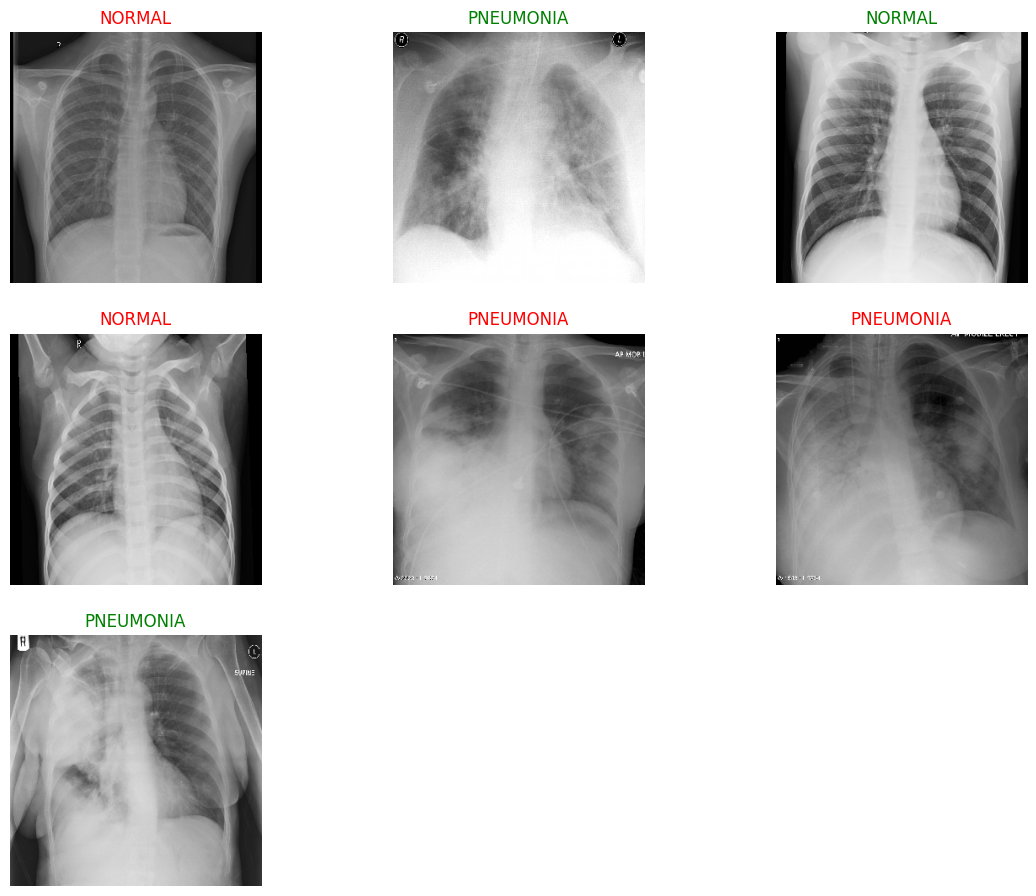

In [ ]:

plot_prediction(test_generator,8)

## CONFUSION MATRIX

Confusion matrix:
 [[ 8 12]
 [ 7 13]]


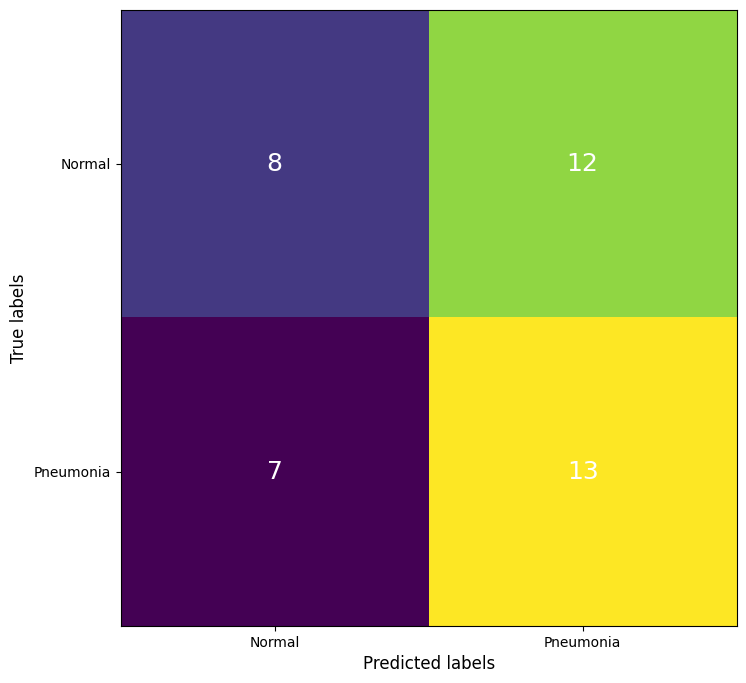

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = np.round(model_pred)
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion matrix:\n", cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted labels', fontsize=12, color='black')
ax.set_ylabel('True labels', fontsize=12, color='black')
ax.xaxis.set(ticks=(0, 1), ticklabels=('Normal', 'Pneumonia'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Normal', 'Pneumonia'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=18)
plt.show()
